### Marriage Dissolution in the U.S.
This dataset, adapted from an example in the software package aML, is based on a longitudinal survey conducted in the U.S.

The dataset has 3771 couples and can be found here: http://data.princeton.edu/wws509/datasets/#divorce

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
COL_NAMES = ['id','husb_educ','husb_black','mixed','years_married','divorced']

In [17]:
raw_data = pd.read_table('divorce.raw.txt', sep="\s+", names=COL_NAMES)

### Data Description
<p><b>id:</b> A couple number. Just a unique identifier</p>
<p><b>husb_educ:</b> education of the husband, coded</p>
<ul>
<li>0 = less than 12 years (high school or less)</li>
<li>1 = 12 to 15 years, and (some college, bachelor's degree)</li>
<li>2 = 16 or more years. (graduate studies)</li>
</ul>
<p><b>husb_black:</b> coded 1 if the husband is black and 0 otherwise</p>
<p><b>mixed:</b> coded 1 if the husband and wife have different ethnicity (defined as black or other), 0 otherwise.
<p><b>years_married:</b> duration of marriage, from the date of wedding to divorce or censoring (due to widowhood or interview).</p>
<p><b>divorced:</b> the failure indicator, coded 1 for divorce and 0 for censoring.

In [18]:
raw_data

,id,husb_educ,husb_black,mixed,years_married,divorced
0,9,1,0,0,10.5460,0
1,11,0,0,0,34.9430,0
2,13,0,0,0,2.8340,1
3,15,0,0,0,17.5320,1
4,33,1,0,0,1.4180,0
5,36,0,0,0,48.0330,0
6,43,2,0,0,16.7060,0
7,47,0,0,0,24.9990,0
8,50,0,0,0,24.9990,0
9,56,0,1,0,3.8690,0


In [19]:
raw_data.describe()

,id,husb_educ,husb_black,mixed,years_married,divorced
count,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,7761.646989,0.744883,0.221003,0.190151,18.410089,0.306141
std,4959.523412,0.666404,0.414984,0.392479,14.901191,0.460957
min,9.000000,0.000000,0.000000,0.000000,0.079000,0.000000
25%,3571.500000,0.000000,0.000000,0.000000,6.484750,0.000000
50%,7130.000000,1.000000,0.000000,0.000000,14.497000,0.000000
75%,11908.000000,1.000000,0.000000,0.000000,26.141000,1.000000
max,17302.000000,2.000000,1.000000,1.000000,73.068000,1.000000


In [20]:
# Print the graph here in the notebook instead of a pop-up window
%matplotlib inline

import matplotlib.pyplot as plt

# Plotting function takes strings: axis names, title and a plot to apply them
def plotting(x_label, y_label, title, plot):
    plot.set_xlabel(x_label, fontsize=16)
    plot.set_ylabel(y_label, fontsize=16)
    plot.set_title(title, fontsize=18)
    plt.show()

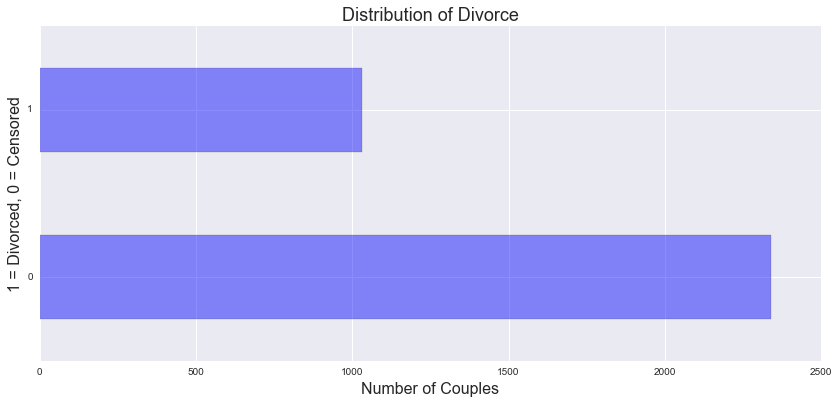

In [21]:
# Firstly, let's plot a simple distribution of how many people survived
plotting('Number of Couples', '1 = Divorced, 0 = Censored', "Distribution of Divorce", 
         raw_data['divorced'].value_counts().plot(kind='barh', alpha = 0.45, figsize=(14,6)))

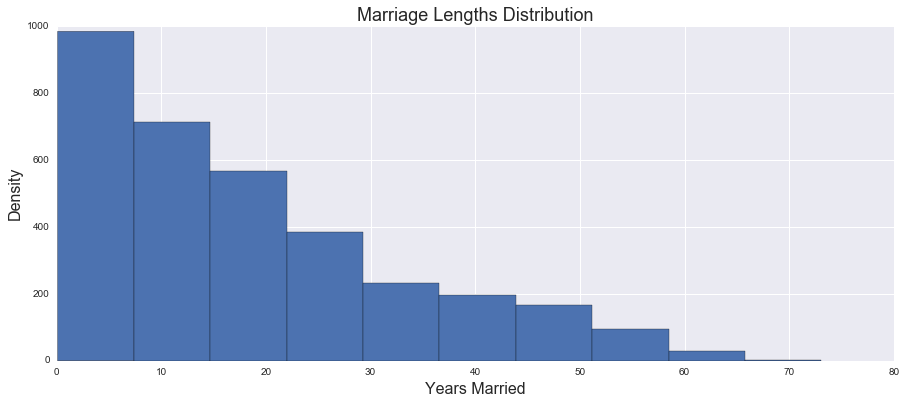

In [22]:
# Plot a kernel desnsity graph where we array index the Age column according to the different classes
plotting("Years Married", "Density", "Marriage Lengths Distribution", raw_data['years_married'].hist(figsize=(15,6)) )

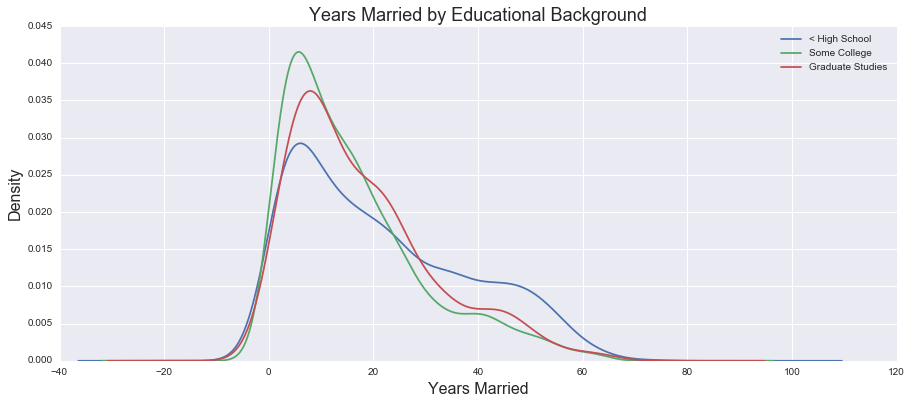

In [23]:
# Plot a kernel desnsity graph where we array index the Years Married column according to the different classes
plot1 = raw_data['years_married'][raw_data['husb_educ']== 0].plot.kde(figsize=(15,6))
plot2 = raw_data['years_married'][raw_data['husb_educ']== 1].plot.kde(figsize=(15,6))
plot3 = raw_data['years_married'][raw_data['husb_educ']== 2].plot.kde(figsize=(15,6))

# Add legend identifying the different curves
plt.legend(('< High School', 'Some College','Graduate Studies'),loc='best') 

# Note this function is called simply to add graph labels in this instance
plotting("Years Married", "Density", "Years Married by Educational Background", plot1 )

Interestingly, it looks like the education of the father doesn't significantly impact the chance of a major lasting longer than less educated husbands. The data peaks within the first 10 years for all educational backgrounds, and diminishes over time.

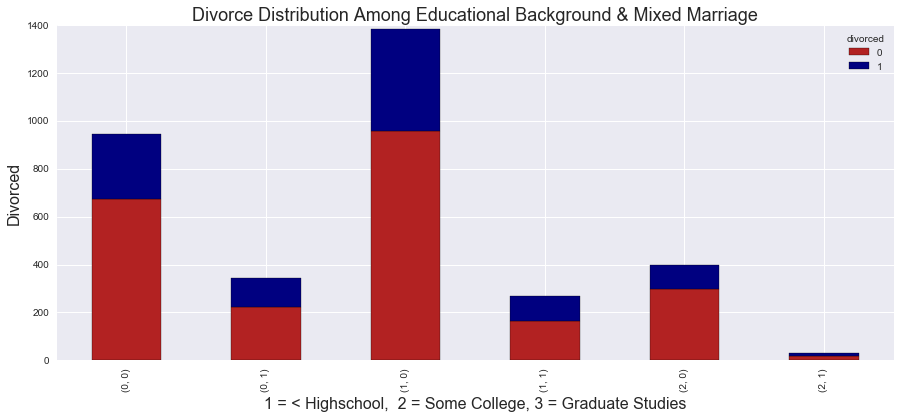

In [24]:
# Cross tabulate the Divorced couples betwen the husband's education & the interracial identifier
# Note raw_sex is used here so male/female text would appear on graph
multivari = pd.crosstab([raw_data["husb_educ"], raw_data["mixed"]], raw_data["divorced"])

# Plot these data sets, stacking survival
plotting("1 = < Highschool,  2 = Some College, 3 = Graduate Studies", 
        "Divorced", "Divorce Distribution Among Educational Background & Mixed Marriage",
        multivari.plot(kind='bar', stacked=True, color=['firebrick', 'navy'], figsize=(15,6)))

## Predictive Analysis

In [25]:
predictors_all = ['husb_educ', 'husb_black', 'mixed', 'years_married']

In [26]:
raw_data['divorced'].value_counts()

0    2339
1    1032
Name: divorced, dtype: int64

In [27]:
raw_data['divorced'].value_counts() / 3371

0    0.693859
1    0.306141
Name: divorced, dtype: float64

30% of couples divorced on average, meaning if we always predict no couple will ever divorce, we'd be right about 70% of the time. This  is the <em><b>null error rate.</b></em> This is how often we'd be wrong if we always predict the majority class which in our case is "not divorced" for our dependent variable. We'll use this as our benchmark or jumping off point for our prediction model.

#### NOTE: in this case, since the output class is a 0/1 binary result, we could have simply caluclated the mean to help us get the null error rate:

In [28]:
raw_data['divorced'].mean()

0.3061406110946307

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [30]:
sigmoid(-0)

0.5

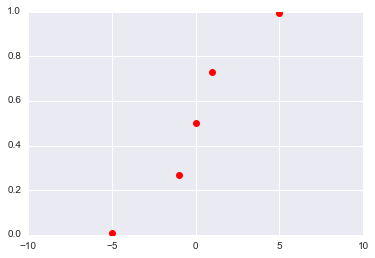

In [31]:
import matplotlib.pyplot as plt
plt.plot([-5,-1,0,1,5], [sigmoid(-5),sigmoid(-1),sigmoid(0),sigmoid(1),sigmoid(5)], 'ro')
plt.axis([-10, 10, 0, 1])
plt.show()

In [40]:
# Initialize our coefficients
[beta0, beta1, beta2, beta3, beta4] = [1]*5
beta_vector = [beta0, beta1, beta2, beta3, beta4]

#Initialize the learning rate, alpha, a general starting point can be from 0.1 to 0.3
alpha = 0.3

training_examples = raw_data.ix[:,1:5].copy()
labels = raw_data['divorced'].copy()

print training_examples

      husb_educ  husb_black  mixed  years_married
0             1           0      0        10.5460
1             0           0      0        34.9430
2             0           0      0         2.8340
3             0           0      0        17.5320
4             1           0      0         1.4180
5             0           0      0        48.0330
6             2           0      0        16.7060
7             0           0      0        24.9990
8             0           0      0        24.9990
9             0           1      0         3.8690
10            1           1      0         7.7320
11            1           0      0         5.2105
12            1           0      0        15.4440
13            2           0      0         4.0850
14            0           0      0        17.3330
15            1           0      0        16.3310
16            1           0      0        35.3350
17            0           0      0        37.6700
18            1           0      0        19.1865


In [63]:
def stochastic_gradient_ascent(learning_rate, X, Y):
    m,n = np.shape(X)
    coefficients = np.ones(n)
    
    for i in range(m):
        h = sigmoid(np.dot(X.iloc[i],coefficients))
        error = Y[i] - h
        coefficients = coefficients + learning_rate * error * X.iloc[i]
    return coefficients

In [66]:
beta_vector = stochastic_gradient_ascent(alpha, training_examples, labels)

In [67]:
beta_vector

husb_educ        1.863053
husb_black      -0.057058
mixed            8.016835
years_married   -1.001869
dtype: float64